<a href="https://colab.research.google.com/github/ktiwari9/algotradingbot/blob/master/Moving_Avg_Convergence_Div_Crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Description: This is an Algorithmic Trading Bot that utilizes the Moving Average Convergence Divergence Crossover aka MACD crossover
# strategy. This strategy is a technical indicator which utilizes the differences in the STMA and LTMA (exponential) moving averages to determine the
# momentum and direction of the market.
# BUY: MACD line cross above the signal line
# SELL: MACD line crosses below the signal line

# Inspired by: https://www.youtube.com/watch?v=kz_NJERCgm8

In [3]:
# All necessary imports
import numpy as np
# Get latest version of pandas for the code to work
# !sudo pip install pandas==1.0
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

1.0.0


In [4]:
# introductory prints
print("This is a MACD Trading Bot")
print("The Trading signal is identified when a MACD line crosses the signal line")
print("MACD line is computed as a different between short-term and long-term exp. moving averages.")

This is a MACD Trading Bot
The Trading signal is identified when a MACD line crosses the signal line
MACD line is computed as a different between short-term and long-term exp. moving averages.


In [5]:
# Import Historic Stock charts - Upload a CSV if not already done
# from google.colab import files
# files.upload()

# dataset obtained from Yahoo Finance: https://finance.yahoo.com/quote/AAPL/history?period1=1159747200&period2=1596326400&interval=1d&filter=history&frequency=1d

In [6]:
# Store the data as a panda dataframe
AAPL = pd.read_csv('AAPL.csv')
# Set the date as the index
AAPL = AAPL.set_index(pd.DatetimeIndex(AAPL['Date'].values)) 

# Show the data
AAPL 

# Truncate the data until 26th Dec 2006
AAPL = AAPL[0:60] # 60 rows mark until 26th Dec 2006
max_close = AAPL['Close'].max()
min_close = AAPL['Close'].min()

print(AAPL)
print("Max Close Price = ", max_close)
print("Min Close Price = ", min_close)

                  Date       Open       High  ...      Close  Adj Close     Volume
2006-10-02  2006-10-02  10.728572  10.838572  ...  10.694285   9.258014  178159800
2006-10-03  2006-10-03  10.635715  10.707143  ...  10.582857   9.161551  197677200
2006-10-04  2006-10-04  10.585714  10.780000  ...  10.768572   9.322326  207270700
2006-10-05  2006-10-05  10.647142  10.880000  ...  10.690000   9.254304  170970800
2006-10-06  2006-10-06  10.631429  10.720000  ...  10.602858   9.178867  116739700
2006-10-09  2006-10-09  10.542857  10.725715  ...  10.661428   9.229569  109555600
2006-10-10  2006-10-10  10.648571  10.654285  ...  10.544286   9.128160  132897100
2006-10-11  2006-10-11  10.488571  10.568571  ...  10.461429   9.056430  142963800
2006-10-12  2006-10-12  10.515715  10.770000  ...  10.751429   9.307484  148213800
2006-10-13  2006-10-13  10.804286  10.982857  ...  10.717143   9.277802  171049200
2006-10-16  2006-10-16  10.741428  10.840000  ...  10.771428   9.324798  127173200
2006

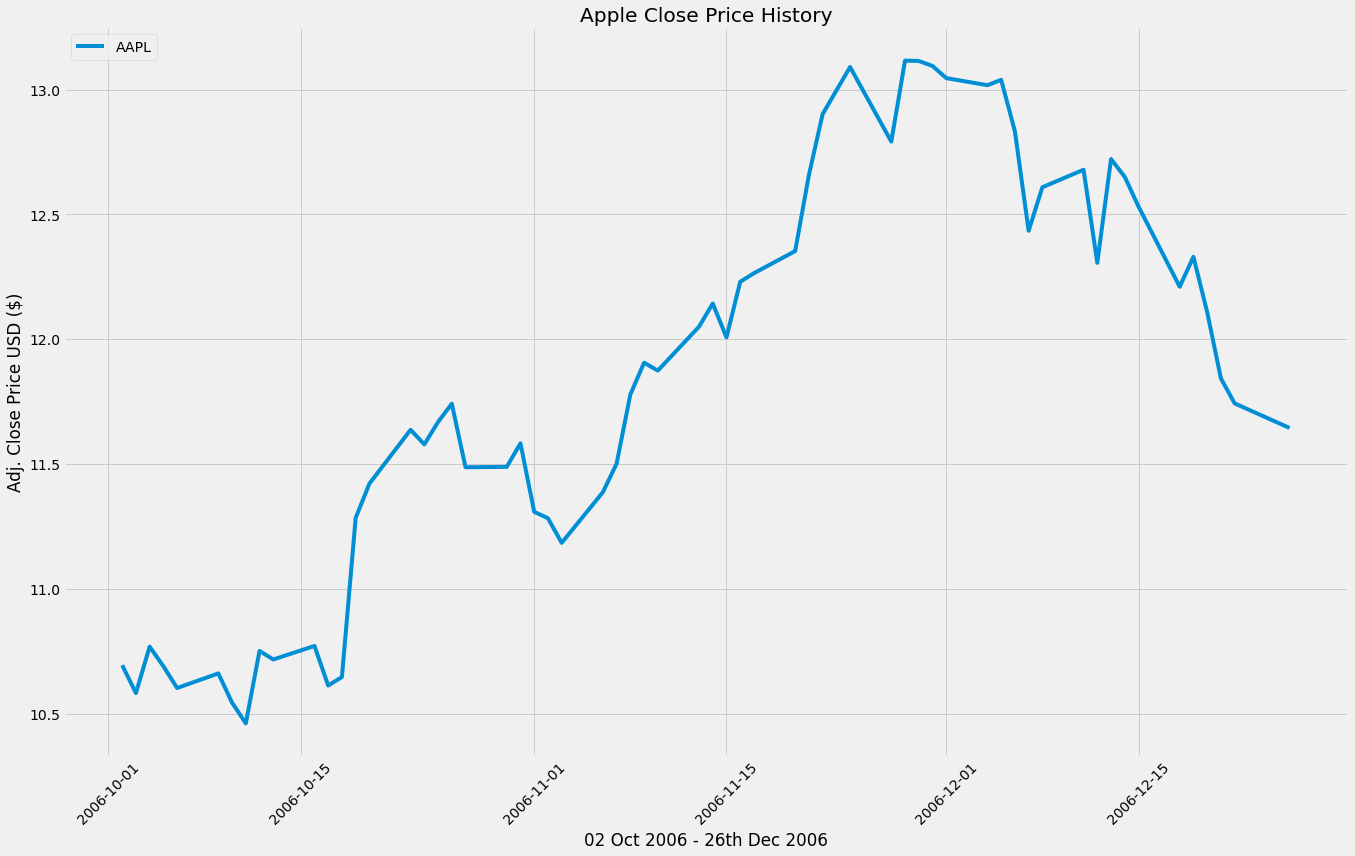

In [7]:
# Plot the data

plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(AAPL['Close'], label = 'AAPL') # adjusted price on the x axis
plt.title('Apple Close Price History')
plt.xlabel('02 Oct 2006 - 26th Dec 2006')
plt.xticks(rotation=45)
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [8]:
# Calculate the MACD and signal line indicators

# Calculate the short term exponential moving average (SEMA)
shortPeriod = 12
Short_EMA = AAPL.Close.ewm(span=shortPeriod, adjust= False).mean()

# Calculate the long term exponential moving average (SEMA)
longPeriod = 26
Long_EMA = AAPL.Close.ewm(span=longPeriod, adjust= False).mean()

# MACD Signal
MACD = Short_EMA - Long_EMA

# Signal line
signalPeriod = 9
signal = MACD.ewm(span=signalPeriod,adjust=False).mean()

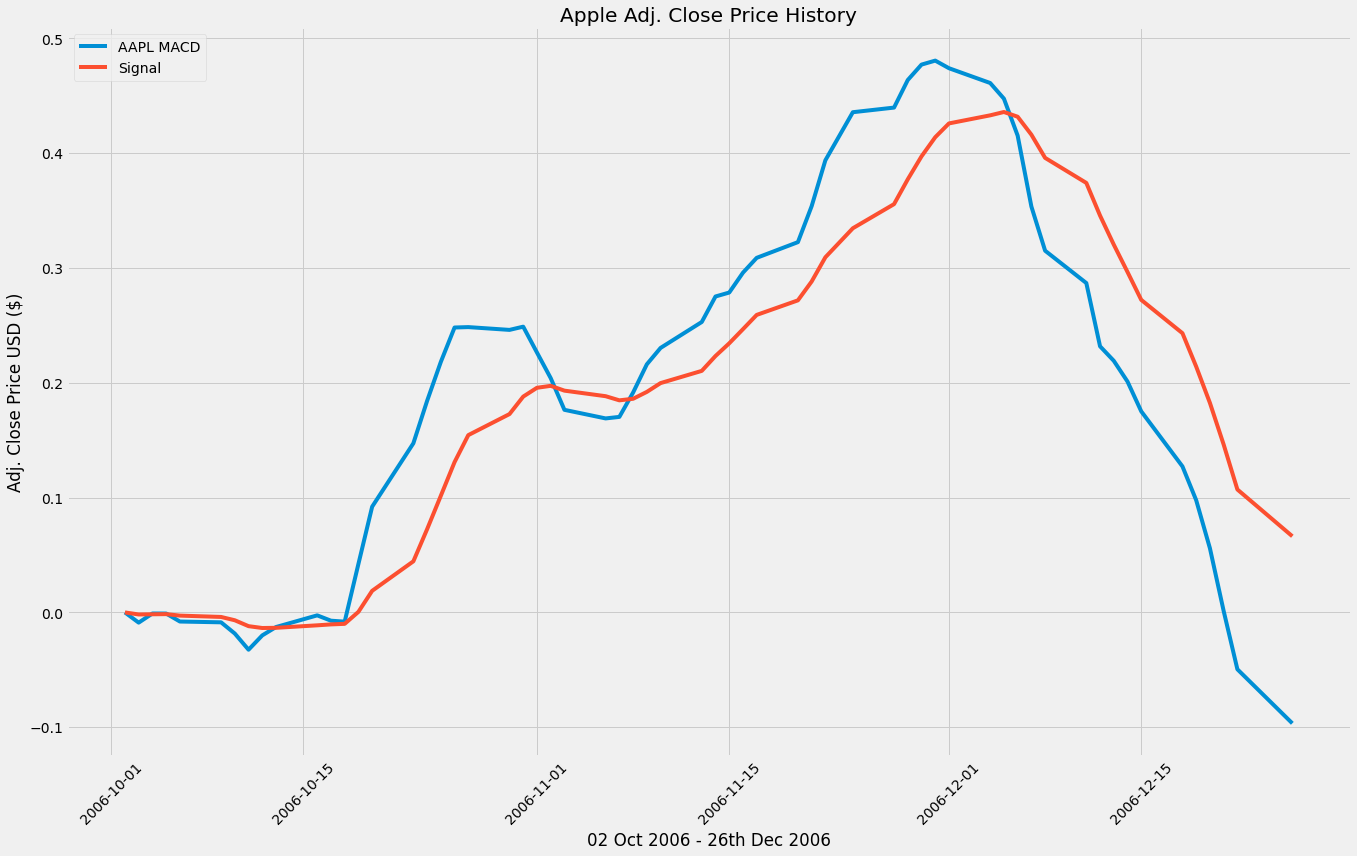

In [9]:
# Plot the data

plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(AAPL.index, MACD, label = 'AAPL MACD') # MACD line
plt.plot(AAPL.index, signal, label = 'Signal') # Signal line

plt.title('Apple Adj. Close Price History')
plt.xlabel('02 Oct 2006 - 26th Dec 2006')
plt.xticks(rotation=45)
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [10]:
# Store MACD and Signal in dataframe
AAPL['MACD']= MACD
AAPL['Signal']= signal

In [11]:
# Create Buy vs Sell signals

def investment_signal(data):
  sigPriceToBuy = []
  sigPriceToSell = []
  isCross = -1 # flag to check when STMA crosses over LTMA

  for i in range(len(data)):
    if data['MACD'][i]> data['Signal'][i]:
      if isCross !=1:
        sigPriceToBuy.append(data['Close'][i]) # good time to buy
        sigPriceToSell.append(np.nan)
        isCross = 1
      else:
        sigPriceToBuy.append(np.nan)
        sigPriceToSell.append(np.nan)
    elif data['MACD'][i]< data['Signal'][i]:
        if isCross!= 0:
          sigPriceToBuy.append(np.nan) 
          sigPriceToSell.append(data['Close'][i]) # good time to sell
          isCross = 0
        else:
          sigPriceToBuy.append(np.nan)
          sigPriceToSell.append(np.nan)
    else:
        sigPriceToBuy.append(np.nan)
        sigPriceToSell.append(np.nan)

  return (sigPriceToBuy,sigPriceToSell)

In [12]:
# Store the Buy and Sell data
buy_sell = investment_signal(AAPL)
AAPL['Buy_Signal_Price'] = buy_sell[0]
AAPL['Sell_Signal_Price'] = buy_sell[1]
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
2006-10-02,2006-10-02,10.728572,10.838572,10.614285,10.694285,9.258014,178159800,0.000000,0.000000,NaN,NaN
2006-10-03,2006-10-03,10.635715,10.707143,10.455714,10.582857,9.161551,197677200,-0.008889,-0.001778,NaN,10.582857
2006-10-04,2006-10-04,10.585714,10.780000,10.451428,10.768572,9.322326,207270700,-0.000937,-0.001610,10.768572,NaN
2006-10-05,2006-10-05,10.647142,10.880000,10.590000,10.690000,9.254304,170970800,-0.000964,-0.001480,NaN,NaN
2006-10-06,2006-10-06,10.631429,10.720000,10.544286,10.602858,9.178867,116739700,-0.007926,-0.002769,NaN,10.602858
2006-10-09,2006-10-09,10.542857,10.725715,10.504286,10.661428,9.229569,109555600,-0.008617,-0.003939,NaN,NaN
2006-10-10,2006-10-10,10.648571,10.654285,10.440000,10.544286,9.128160,132897100,-0.018406,-0.006832,NaN,NaN
2006-10-11,2006-10-11,10.488571,10.568571,10.371428,10.461429,9.056430,142963800,-0.032475,-0.011961,NaN,NaN
2006-10-12,2006-10-12,10.515715,10.770000,10.514286,10.751429,9.307484,148213800,-0.019993,-0.013567,NaN,NaN
2006-10-13,2006-10-13,10.804286,10.982857,10.677143,10.717143,9.277802,171049200,-0.012722,-0.013398,10.717143,NaN


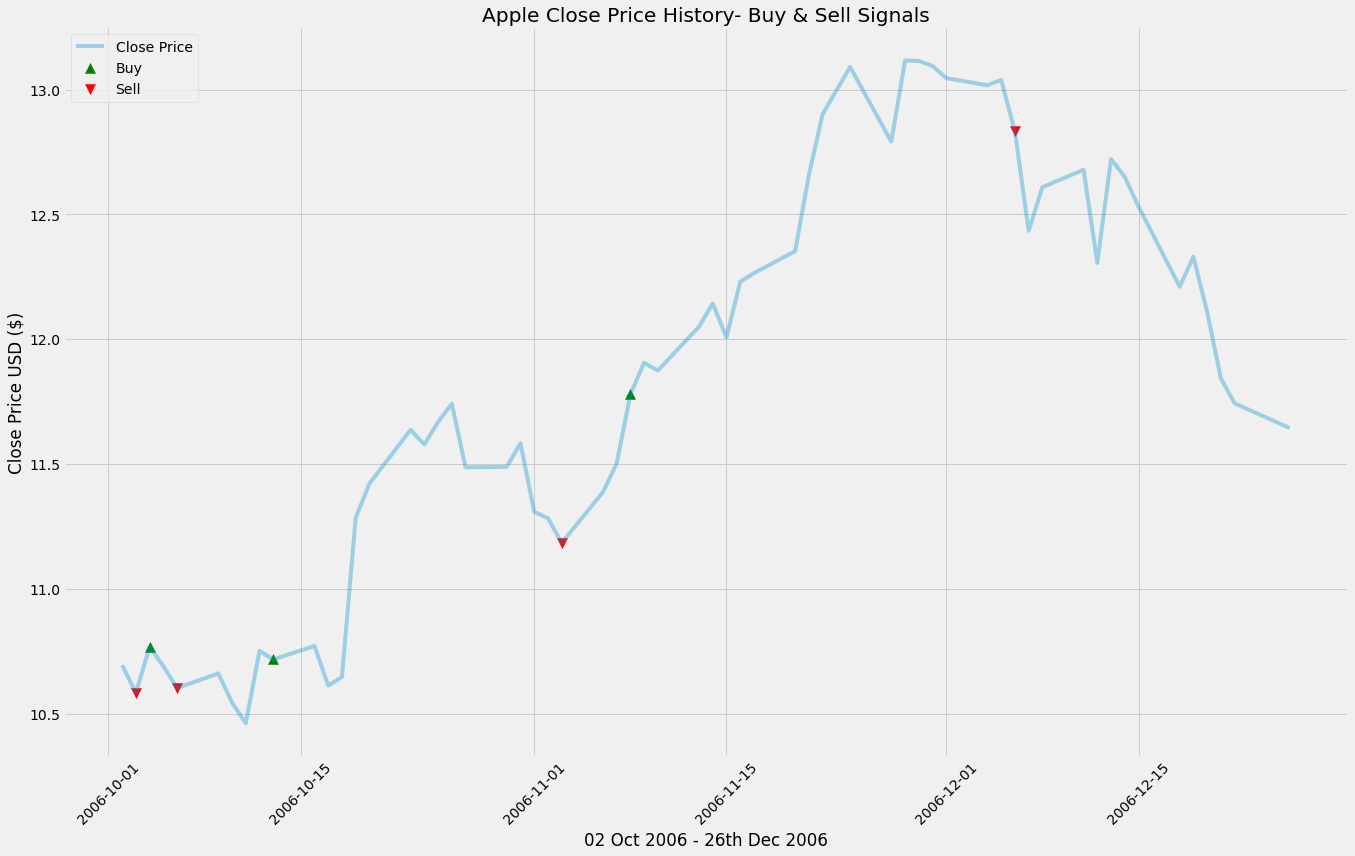

In [13]:
# Plot the data with buy and signal markers
plt.figure(figsize=(20.5,12.5)) # sizes are in inches

# Close Price
plt.plot(AAPL['Close'],label='Close Price', alpha = 0.35)

# Buy Signal
plt.scatter(AAPL.index, AAPL['Buy_Signal_Price'], label = 'Buy', marker = "^", color="green",s=100) # Decision Made to buy

# Sell Signal
plt.scatter(AAPL.index,AAPL['Sell_Signal_Price'], label = 'Sell',  marker = "v", color="red",s=100) # long term moving avg

plt.title('Apple Close Price History- Buy & Sell Signals')
plt.xlabel('02 Oct 2006 - 26th Dec 2006')
plt.xticks(rotation=45)
plt.xticks(rotation = 45)
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()